# Advanced Statistical Analysis and Hypothesis Testing

### What is a Hypothesis?
It is a statement that proposes a possible explanation for an observed phenomenon or relationship, which scientists can test through investigation.

![involves.PNG](https://s3.us-east-1.amazonaws.com/static2.simplilearn.com/lms/testpaper_images/ADSP/Advanced_Statistics/involves.PNG)

### Hypothesis Components
A hypothesis has two components:
    
![Linear1hypothes.png](https://s3.us-east-1.amazonaws.com/static2.simplilearn.com/lms/testpaper_images/ADSP/Advanced_Statistics/Linear1hypothes.png)


**Example**

If you do not clean the fish tank once every three days, the fish will probably not survive for more than three months.

- __Do not clean the fish tank once every three days__ is the independent variable.
- __Fish will probably not survive for more than three months__ is the dependent variable.




A good hypothesis must:
1. Explicitly include the **independent** and **dependent** variables
2. Must be testable (reproducibility) for testing 
3. Be based on authentic research work and sample collection (good representative of the population)

### Null and Alternative Hypothesis
Commonly, there are 2 main types:
1. Null Hypothesis $H_0$
2. Alternative Hypothesis $H_a$ (sometimes $H_1$)

### Hypothesis Testing Outcomes: Type I and Type II Errors
There are four decisions and outcomes for hypothesis testing:

![type12.PNG](https://s3.us-east-1.amazonaws.com/static2.simplilearn.com/lms/testpaper_images/ADSP/Advanced_Statistics/type12.PNG)

1. $H_0$ (null hypothesis) is TRUE and it is rejected: **this is a Type I error**

2. $H_0$ (null hypothesis) is TRUE and it is accepted: **correct decision**

3. $H_0$ (null hypothesis) is FALSE and it is rejected: **correct decision**

4. $H_0$ (null hypothesis) is FALSE and it is accepted: **this is a Type II error**


## Decision Making Using p-value and critical value for Hypothesis Testing

### p-value and alpha

1. Define the statement of the hypothesis (clearly showing dependent and independent variables)
2. Establish the Null and Alternative Hypotheses ($H_0$ vs $H_a$)
3. Choose the appropriate type of statistical test based on sample size, data type, distribution, and objective:
    - t-test
    - z-test
    - chi-square test
    - ANOVA
    - Other: MANOVA and Kruskal–Wallis tests
4. If not mentioned/specified, define the level of significance (critical value or alpha) - most of the time it is 5% or 1 %
5. Calculate the p-value
6. Run the evaluation based of item 4 and 5:
    - If the p-value is **greater** than alpha, we **do NOT reject the null hypothesis**
    - If the p-value is **less** than alpha, we **do reject the null hypothesis** 


![pv](https://www.automacaodedados.com.br/en/stories/estatistica-em-testes-para-nao-matematicos-parte-5/images/figure3-p-value-greater-than-alpha-en.webp)

![h](https://userpage.fu-berlin.de/soga/soga-py/200/2070_hypothesis_tests/img/Generalized_figure_of_two_sided_test.png)

### t-test
#### When to use t-test?
- When the sample size if very small (<=30)
- When the data is close to normal distribution
- When comparing the means of 2 groups to evaluate if they differ or not
- When you want to compare the effect of a variable before or after an event

### Types of t-tests
- **Independent sample t-test** check the aver of 2 independent, unrelated groups. e.f. people that eat banans have a stomach ache vs a different group of people who do not eat bananas
    - $H_0$: $\mu_x$ = $\mu_y$ there's no difference between the groups
    - $H_a$: $\mu_x$ $\neq$ $\mu_y$ there's a difference between the groups

- **Paird-sample t-test** relationship test. checks if the averages of 2 samples taken from the same group are equal or not. Mainly used for before vs after an event analysis. Patient BP before and after treatment. Same population, different point in time.
    - $H_0$: $\mu_b$ = $\mu_a$ there's no difference between before and after on the same group
    - $H_a$: $\mu_b$ $\neq$ $\mu_a$ there's a difference between before and after

- **One-sample t-test** It evaluates if the average of a single group is different than the known population average (X). e.g average IQ of US adult is 108. We collect a sample from the population and evaluate it against the claim.
    - $H_0$: $\mu_s$ = X there's no difference between the average of the sample and the claimed population average
    - $H_a$: $\mu_s$ $\neq$ X there's a difference between the average of the sample and the claimed population average

#### Independent Sample t-test

**Scenario: A/B Testing for New Website Functionality**

Imagine you work for an e-commerce company, and your team is responsible for optimizing the company's website to increase user engagement and, ultimately, sales. The current design of the "Buy Now" button on the website is being tested against a new design to see if it leads to a higher conversion rate.

 
Methodology:
- randomly selected website users broken into 2 independent groups (groups A and B)
- give group A the old website (old functionality) and group B the new website (new button)
- measure the usage score
- perform a statistical analysis to evaluate whether there's a difference in engagement between group A and B

**Solution**
- $H_0$: $\mu_x$ = $\mu_y$ there's no difference between the groups (the new button doesn't affect usage)
- $H_a$: $\mu_x$ $\neq$ $\mu_y$ there's a difference between the groups (the new button does affect usage)

In [1]:
import pandas as pd
import scipy.stats as sts

In [2]:
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/AB_Testing_Website.csv')
df.head()

,Group_A,Group_B
0,38,47
1,34,48
2,35,50
3,35,49
4,35,46


In [3]:
# run a t-test analysis
# it gives 2 values: t-statistic and p-value
t_stat, p_val = sts.ttest_ind(df['Group_A'], df['Group_B'])

In [4]:
print(f't-statistic: {t_stat} | p-value: {p_val}')

t-statistic: -15.418485894752864 | p-value: 8.2568977246166655e-22


In [5]:
# so we can set alpha to the common value 5%

alpha = .05

if p_val>alpha:
    print('We accept (do not reject) the null hypothesis. There is no impact on the usage from the new button/functionality')
else:
    print('We reject the null hypothesis. There is an impact on the usage from the new button/functionality')

We reject the null hypothesis. There is an impact on the usage from the new button/functionality


In [6]:
# to evaluate if the impact was positive
t_stat, p_val = sts.ttest_ind(df['Group_A'], df['Group_B'], alternative='greater')
# because we chose Group A first, then the evaluation is Group A > Group B

if p_val>alpha:
    print('Group A is not greater than group B. Therefore, the new button has better usage') 
else:
    print('Group A is greater than group B')

Group A is not greater than group B. Therefore, the new button has better usage


In [7]:
# build a function to run the evaluation for all problems below
def HypoTesting(p_val, alpha):
    if p_val>alpha:
        print('We accept (do not reject) the null hypothesis.')
    else:
        print('We reject the null hypothesis.')

#### Paired Sample t-test

**Example** </br>
For a particular hospital, it is advertised that a particular chemotherapy session does not affect the patient's health 
based on blood pressure (BP).
It is to be checked if the BP before the treatment is equivalent to the BP after the treatment.
Perform a statistical significance at alpha=0.05 to help validate the claim.

In [8]:
bp_df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/blood_pressure.csv')
bp_df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


- $H_0$ : difference between the averages is 0. There's no impact on blood pressure after chemo
- $H_a$ : difference between the averages is not 0. There's an impact on blood pressure after chemo

In [9]:
t_test, p_val = sts.ttest_rel(bp_df['bp_before'], bp_df['bp_after'])

In [10]:
alpha = 0.05
HypoTesting(p_val, alpha)

We reject the null hypothesis.


Because we reject the null hypothesis, the hospital's claim is incorrect. The chemo therapy does increase blood pressure.

**Homework** Split the population into M and F and see if the hypothesis is rejected or accepted for both

#### One-sample t-test

**Example**
For a particular organization, the average age of the employees was claimed 30 years.
The authorities collected a random sample of 10 employees' age data to check the claim made by the organization.
Construct a hypothesis test to validate the hypothesis at a significance level of 0.05.

- $H_0$: $\mu_s$ = 30 there's no difference between the average of the sample and the claimed population average
- $H_a$: $\mu_s$ $\neq$ 30 there's a difference between the average of the sample and the claimed population average

In [11]:
ages_df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/Ages.csv')
ages_df.head()

,ages
0,34
1,45
2,65
3,78
4,32


In [12]:
t_test, p_val = sts.ttest_1samp(ages_df, 30)

In [13]:
HypoTesting(p_val, alpha)

We reject the null hypothesis.


We reject the null hypothesis. Therefore, the 30 years average age in the organization is not valid.

### z-test

When to use:
- The population variance is know
- If the population variance is unknown, but the sample size is large.

**Example**</br>
A school principal claims that the students in his school are more intelligent than those of other schools. A random sample of 50 students' IQ scores has a mean score of 110. The mean population IQ is 100 with a Standard deviation of 15. State whether the claim of the principal is right or not at a 5% significance level.


- $H_0$ The average IQ of the sample is equal to the population (equal to 100) -> disagreeing with the principal's statement
- $H_a$ The average IQ of the sample does not equal to the population (equal to 100) 

In [14]:
# sample info
size_sm = 50
mean_sm = 110

# population info
sd_pop = 15
mean_pop = 100

alpha = 0.05

- We're missing the data to run the analysis
- We can generate the data of the students based on the givens (mean, size, and SD) assuming they follow a normal distribution
- However, we're missing the SD of the sample. Therefore, we need to derive it from the population

![Sd](https://uedufy.com/wp-content/uploads/2022/03/image-3.png)

In [15]:
import math
sd_sm = sd_pop/math.sqrt(size_sm)
sd_sm

2.1213203435596424

In [16]:
# now we can generate our synthetic data based on the statistics
import numpy as np
# pass the mean, sd, size
student_sample = np.random.normal(loc=mean_sm, scale=sd_sm, size=size_sm)
student_sample

array([109.79462458, 108.8183422 , 109.48634272, 104.87929624,
       111.28279652, 111.41623144, 109.03513745, 109.55710036,
       107.94026986, 110.18096753, 109.61991889, 111.15681391,
       108.55852933, 109.3427375 , 110.79153874, 108.01880156,
       109.60637208, 110.12175545, 110.54016574, 108.16873159,
       107.9767357 , 105.86496051, 109.97667629, 110.88577645,
       111.63281551, 111.64098768, 107.34939516, 110.25627464,
       110.52365959, 109.17085399, 108.65060055, 109.51760278,
       110.94178984, 109.65574895, 109.49005383, 109.35299415,
       107.15120742, 107.08748576, 107.23218156, 111.5726628 ,
       110.97818462, 112.65053438, 109.60387895, 108.94169683,
       108.31904752, 112.75736235, 111.87684416, 111.65524817,
       112.63368118, 111.25575208])

In [17]:
#check the size
len(student_sample)

50

In [18]:
np.mean(student_sample)

109.69838334252795

In [19]:
#now we're ready to tun z test on the sample

from statsmodels.stats.weightstats import ztest

z_stat, p_val = ztest(student_sample, value=mean_pop)

In [20]:
HypoTesting(p_val, alpha)

We reject the null hypothesis.


- $H_0$ : difference in means equals to value (disagree with the principal)
- $H_a$ : The sample mean is significantly different from the population mean (agree with principal)

For larger:
-  $H_0$ : difference in means is not larger than value
-  $H_a$ : the sample mean is larger than the one for population

In [21]:
z_stat, p_val = ztest(student_sample, value=mean_pop, alternative='larger')
HypoTesting(p_val, alpha)

We reject the null hypothesis.


In [23]:
if p_val < alpha:
    print("Reject the null hypothesis. The principal's claim is supported.")
else:
    print("Fail to reject the null hypothesis. The principal's claim is not supported.")

Reject the null hypothesis. The principal's claim is supported.


### Alternative Approach

In [22]:
from scipy.stats import norm

# Given data
sample_mean = 110
population_mean = 100
population_std = 15
sample_size = 50

# Calculate the Z-score
z_score = (sample_mean - population_mean) / (population_std / (sample_size ** 0.5))

# Calculate the p-value
p_value = 1 - norm.cdf(z_score)

# Print the results
print("Z-score:", z_score)
print("p-value:", p_value)

# Determine if we reject the null hypothesis at the 5% significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The principal's claim is supported.")
else:
    print("Fail to reject the null hypothesis. The principal's claim is not supported.")


Z-score: 4.714045207910317
p-value: 1.2142337364462463e-06
Reject the null hypothesis. The principal's claim is supported.


To test the principal's claim, we can perform a one-sample z-test. Here, we will compare the sample mean IQ score to the population mean IQ score to determine if the sample mean is significantly higher.

### Steps to Perform the Z-Test:
1. **State the Hypotheses**:
   - Null Hypothesis (\(H_0\)): The mean IQ of students in the principal's school is equal to the population mean IQ (\(\mu = 100\)).
   - Alternative Hypothesis (\(H_1\)): The mean IQ of students in the principal's school is greater than the population mean IQ (\(\mu > 100\)).

2. **Calculate the Z-Score**:
   - The Z-score formula for a sample mean is:
     \[
     Z = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}}
     \]
     where:
     - \(\bar{X}\) is the sample mean.
     - \(\mu\) is the population mean.
     - \(\sigma\) is the population standard deviation.
     - \(n\) is the sample size.

3. **Determine the Critical Z-Value and p-Value**:
   - For a one-tailed test at a 5% significance level (\(\alpha = 0.05\)), the critical Z-value is approximately 1.645.

4. **Compare the Calculated Z-Score with the Critical Z-Value**:
   - If the calculated Z-score is greater than the critical Z-value, we reject the null hypothesis.

Let's perform these calculations in Python using `scipy`:


### Interpretation of the Results:
- **Z-score**: This tells us how many standard deviations the sample mean is from the population mean.
- **p-value**: This represents the probability of observing a sample mean as extreme as 110 if the null hypothesis is true.
- If the p-value is less than the significance level (0.05), we reject the null hypothesis, indicating that the students' IQ scores in the principal's school are significantly higher than the population mean.

Let's execute the code to see the results.

### Results:
- **Z-score**: 4.714
- **p-value**: \(1.214 \times 10^{-6}\)

Since the p-value is significantly less than the significance level of 0.05, we reject the null hypothesis.

### Conclusion:
The Z-score of 4.714 indicates that the sample mean is 4.714 standard deviations above the population mean. The extremely low p-value (\(1.214 \times 10^{-6}\)) provides strong evidence against the null hypothesis. 

Therefore, we reject the null hypothesis and conclude that the principal's claim that the students in his school are more intelligent than those of other schools is supported at the 5% significance level.

### Chi-Square Distribution and Test

![c](https://www.easysevens.com/wp-content/uploads/2024/01/Chi-Squared-Distribution.png)

- The Chi Square ($X^2$) a statistical method used to determent if there is a relationship/association between **two categorical variables**
- It measures the expected frequencies for one of more categories
- it is mainly usd for 2 types of tests:
    - Test for Independence: if there's a relationship between 2 categorical variables/arrays
    - Goodness-of-fit: if a sample data matches a population with a specific distribution
- Steps to perform the chi-square test:
    1. Define the null and alternative hypothesis
    2. Build a contingency table between the 2 variables
    3. Calculate the chi2 values and expected frequencies 
    4. Compare the critical value to p-value

- $H_0$ there's no relationship between the 2 variables
- $H_a$ there's a relationship between the 2 variables

## Example
Let's say we gathered a survey for favorite car color between men and women. We want to find out if there's an association between gender and car color.

- $H_0$ there's no relationship between the choice of color and gender
- $H_a$ there's a relationship between the choice of color and gender

In [28]:
df_shop = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/Shopping.csv')
df_shop.head()

,Gender,Car Color
0,M,Black
1,M,Silver
2,M,Red
3,M,Black
4,M,Black


**Exploratory Data Analysis**

In [30]:
# let's check if there's a balance between gender and color
df_shop['Gender'].value_counts()

Gender
F    55
M    49
Name: count, dtype: int64

In [31]:
df_shop['Car Color'].value_counts()

Car Color
Black     31
Silver    24
Pink      24
White     16
Red        9
Name: count, dtype: int64

In [32]:
#step 2
# contingency table means pivot/crosstab of the occurrences of each category with the other

cont_table = pd.crosstab(df_shop['Gender'], df_shop['Car Color'])
cont_table

Car Color,Black,Pink,Red,Silver,White
Gender,,,,,
F,9,22,2,8,14
M,22,2,7,16,2


- Pink color is more popular for females
- Black is the most popular for males
- There's not really a color that's equal across genders
- pink (M) and red (F) are the least liked 

In [33]:
# step 3
chi_results = sts.chi2_contingency(cont_table)
chi_results

Chi2ContingencyResult(statistic=36.33751604258517, pvalue=2.466054233511132e-07, dof=4, expected_freq=array([[16.39423077, 12.69230769,  4.75961538, 12.69230769,  8.46153846],
       [14.60576923, 11.30769231,  4.24038462, 11.30769231,  7.53846154]]))

The results are packaged as the following:
- statistic: float - The test statistic.
- pvalue: float - The p-value of the test.
- dof: int - The degrees of freedom.
- expected_freq: ndarray - same shape as observed. The expected frequencies, based on the marginal sums of the table.

In [34]:
p_val = chi_results[1]
p_val

2.466054233511132e-07

In [35]:
# method 2

chi_stat, p_val, dof, ex_freq = sts.chi2_contingency(cont_table)

In [36]:
# evaluation
HypoTesting(p_val, alpha)

We reject the null hypothesis.


- We reject the null hypothesis. Therefore, there's a relationship between Gender and Car Color.
- The expected values is basically what the data should look like if there's no relationship (to satisfy the $H_0$)

In [38]:
exp_freq_df = pd.DataFrame(data= ex_freq,
                           index=['F', 'M'],
                           columns=['Black', 'Pink', 'Red', 'Silver', 'White'])
exp_freq_df

,Black,Pink,Red,Silver,White
F,16.394231,12.692308,4.759615,12.692308,8.461538
M,14.605769,11.307692,4.240385,11.307692,7.538462


### ANOVA

- ANOVA: Analysis of Variance 
- It assesses whether the means of multiple groups are statistically significant from each other or not
- t-test and z-test are limited to 2 groups evaluation. ANOVA can do 2 or more
- The statistical result of ANOVA is called f-statistic. Fischer statistic
- Types:
    - one-way ANOVA: deals with one factor for multiple groups. e.g. student IQ evaluation for 3 different classes
    - two-way ANOVA: deals with two factors for multiple groups. e.g. student IQ and age evaluation for 3 different classes
    - MANOVA: multiple factors with multiple groups

**Example** </br>
Suppose you are a researcher conducting an agricultural study to compare the yield of three different fertilizer treatments (Treatment A, Treatment B, and Treatment C) on a specific type of crop. You want to determine if there are significant differences in crop yields among the treatments.

Solution:
- We have multiple groups with 1 factor: one-way ANOVA
- Let's define the Hypotheses:
    - $H_0$ the means of all treatments are equal (no difference or change)
    - $H_a$ at least one of the treatments (A, B, or C) has a significantly different mean

In [39]:
df_crop = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/crop_yield_treatment.csv')
df_crop.head()

,Treatment_A,Treatment_B,Treatment_C
0,50,56,49
1,54,47,57
2,57,55,46
3,49,41,40
4,46,56,54


In [40]:
f_stat, p_val = sts.f_oneway(df_crop['Treatment_A'],df_crop['Treatment_B'],df_crop['Treatment_C'])

In [41]:
HypoTesting(p_val, alpha)

We accept (do not reject) the null hypothesis.


We accept (do not reject) the null hypothesis. Therefore, all treatments are equal (no difference to crop yield)

### Mann-Whitney U Test

- There's a weakness with using z-test if the data is not normally distributed
- In this case, we need to use "non-parametric" evaluation (aka Mann-Whitney U test)
- Non-parametric evaluation means 
    - it doesn't rely on statistical measures, such as mean and standard deviation
    - it doesn't use normal distribution assumptions
- The test statistic is called u-statistic

**Example**</br>
Evaluate of the salaries of post-graduate students from 2 different universities are different from each other.

In [43]:
df_sal = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/Mann-Whitney_U_Salaires.csv')
df_sal.head()

,UnivOfDallas,ArizonaStateUniv
0,71555,73589
1,67887,83621
2,84334,74681
3,70133,83873
4,89304,72350


In [44]:
# let's inspect the distribution

df_sal.skew()

UnivOfDallas       -0.270814
ArizonaStateUniv   -0.489069
dtype: float64

array([[<Axes: title={'center': 'UnivOfDallas'}>,
        <Axes: title={'center': 'ArizonaStateUniv'}>]], dtype=object)

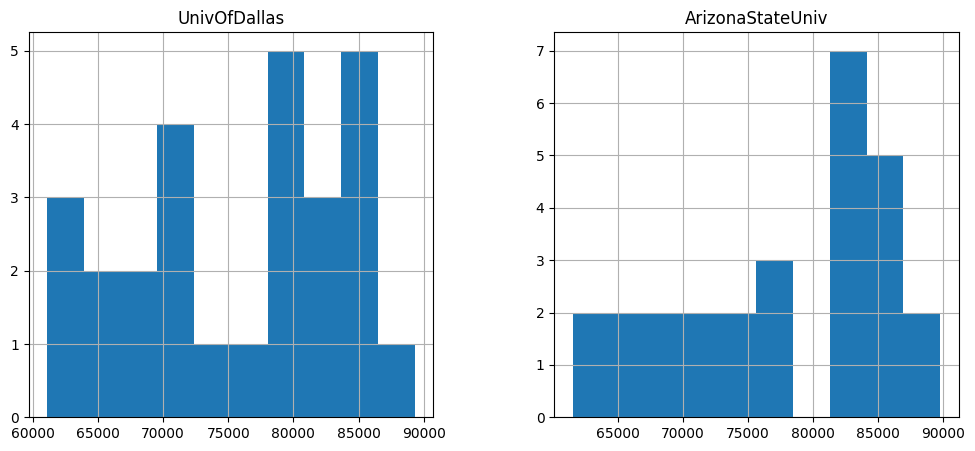

In [47]:
df_sal.hist(figsize=(12,5))

In [48]:
u_stat, p_val = sts.mannwhitneyu(df_sal['UnivOfDallas'], df_sal['ArizonaStateUniv'])

HypoTesting(p_val, alpha)

We accept (do not reject) the null hypothesis.


In [49]:
p_val

0.33264564230490734

Since We accept (do not reject) the null hypothesis, there's no significant difference between the salaries of the universities' post grads.

## Kruskal-Wallis Test

- When the data is not normally distributed
- When you have more than 2 independent groups/variables

**Example**</br>
We have 3 different diets, and we want to compare their effects on weight loss.

In [50]:
diet_A = [2.5, 3.0, 3.5, 3.2]
diet_B = [3.6, 3.9, 4.2, 4.0]
diet_C = [2.8, 3.1, 3.3, 3.7]

In [51]:
h_stat, p_val = sts.kruskal(diet_A, diet_B, diet_C)

HypoTesting(p_val, alpha)

We reject the null hypothesis.


We reject the null hypothesis. Therefore, there's a significant difference between the groups.